In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import keras
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Activation,MaxPool2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model, Sequential
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from tensorflow.keras.regularizers import l2
from PIL import Image
from IPython.display import display,clear_output
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

In [2]:
labels = ['no-plastic','plastic']

In [3]:
X_train = []
y_train = []
image_size = 224

In [4]:
for i in labels:
    folderPath = os.path.join(r'dataset/','train',i)
    for j in (os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'dataset/','test',i)
    for j in (os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train.shape

(2150, 224, 224, 3)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(2150, 224, 224, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=6, kernel_size=(5,5), 
                 padding="same", activation="relu", 
                 kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding="same", 
                 activation="relu", 
                 kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", 
                 kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", 
                 activation="relu", 
                 kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu", 
                kernel_regularizer=l2(0.001)))
model.add(Dense(units=128, activation="relu", 
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

C:\Users\AnirudhMutnuru\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])
r=model.fit(X_train,y_train,validation_split=0.1, epochs = 50,steps_per_epoch=12, verbose=1, batch_size=30)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.5375 - loss: 7.0650 - val_accuracy: 0.5876 - val_loss: 1.0872
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5650 - loss: 1.0822 - val_accuracy: 0.5670 - val_loss: 1.0546
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5553 - loss: 1.0668 - val_accuracy: 0.5825 - val_loss: 1.0336
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6443 - loss: 1.0082 - val_accuracy: 0.6753 - val_loss: 1.0274
Epoch 5/50
10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6542 - loss: 1.0233

C:\Users\AnirudhMutnuru\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6504 - loss: 1.0228 - val_accuracy: 0.7320 - val_loss: 0.9797
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7120 - loss: 0.9758 - val_accuracy: 0.7526 - val_loss: 0.9423
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7461 - loss: 0.9393 - val_accuracy: 0.7113 - val_loss: 0.9293
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7186 - loss: 0.8825 - val_accuracy: 0.7216 - val_loss: 0.9267
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.7267 - loss: 0.9576 - val_accuracy: 0.7371 - val_loss: 0.9127
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7623 - loss: 0.8618 - val_accuracy: 0.7062 - val_loss: 0.9083
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7164 - loss: 1.0105 - val_accuracy: 0.7062 - val_loss: 0.9644
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7245 - loss: 0.9434 - val_accuracy: 0.7371 - val

In [22]:
train_dir = "dataset/train"
test_dir = "dataset/test"

In [23]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 1720 files belonging to 2 classes.
Found 430 files belonging to 2 classes.


In [25]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [26]:
print(classification_report(y_test_new,pred))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.83      0.87      0.85       115

    accuracy                           0.84       215
   macro avg       0.84      0.83      0.84       215
weighted avg       0.84      0.84      0.84       215



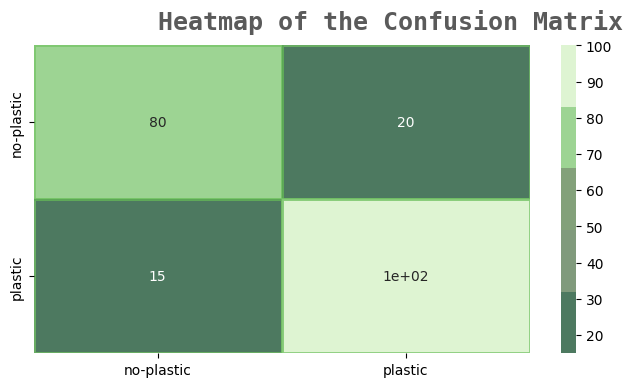

In [27]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']



fig,ax=plt.subplots(1,1,figsize=(8,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::1],alpha=0.7,linewidths=2,linecolor=colors_green[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


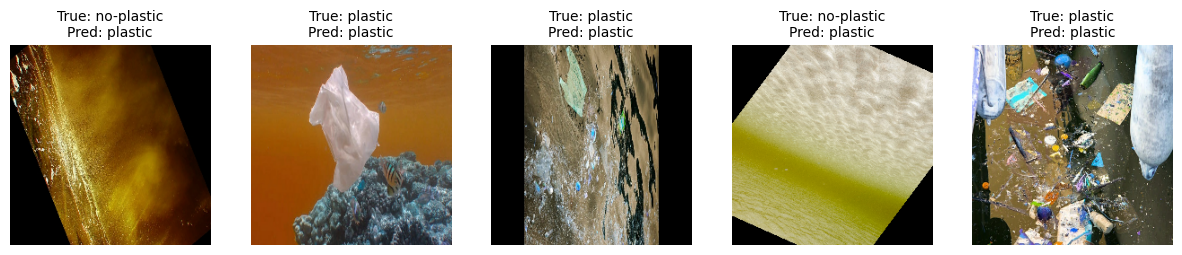

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with predicted and true labels
def display_predictions(model, test_data, class_names, num_images=5):
    plt.figure(figsize=(15, 10))
    for images, labels in test_data.take(1):  # Take one batch of data
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(labels.numpy(), axis=1)
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            title = f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}"
            plt.title(title, fontsize=10)
            plt.axis("off")
    plt.show()

# Assuming your class names are available as test_data.class_names
display_predictions(model, test_data, test_data.class_names, num_images=5)


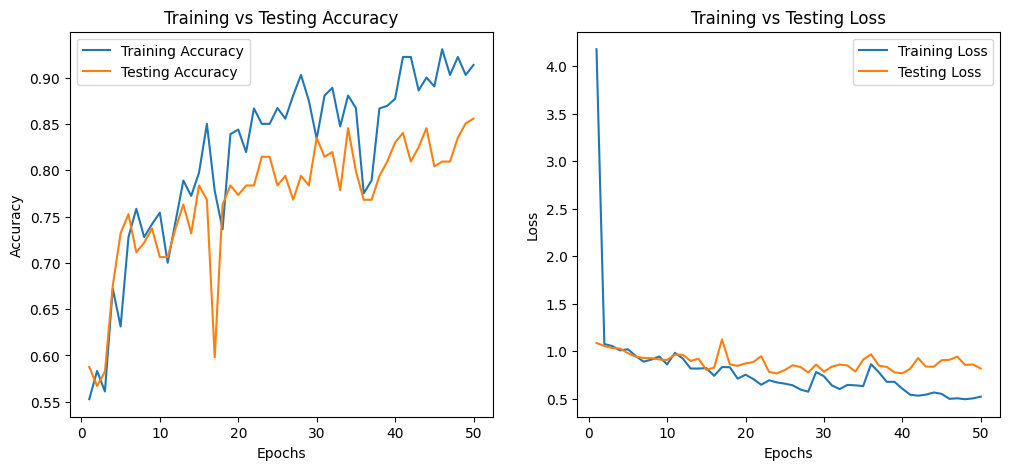

In [29]:
def plot_train_vs_test(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Testing Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Testing Loss')
    plt.legend()

    plt.show()
plot_train_vs_test(r)


In [30]:
model.save("ocean.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


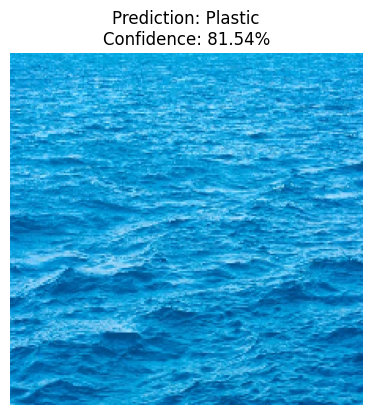

('Plastic', 81.5424382686615)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_plastic(image_path, model):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    display_img = img_array 
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    prediction = model.predict(img_array)
    classes = ['Non-Plastic', 'Plastic']
    result = classes[np.argmax(prediction)]
    confidence = prediction[0][np.argmax(prediction)] * 100
    
    # Display image and prediction
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(display_img/255.0)
    plt.title(f'Prediction: {result}\nConfidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()
    
    return result, confidence

# Load model
model = load_model('ocean.h5')

# Predict
image_path = 'test7.jpg'
predict_plastic(image_path, model)




In [36]:
import torch
from PIL import Image
import numpy as np

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Preprocess the image
image_path = 'test6.jpg'
img = Image.open(image_path)
img_array = np.array(img)
results = model(img_array)

# Render the prediction
boxes = results.xyxy[0].tolist()
for box in boxes:
    x1, y1, x2, y2, confidence, class_id = box
    if int(class_id) == 0:  # 0 is for 'Plastic' class
        print(f"Prediction: Plastic, Confidence: {confidence*100:.2f}%")
        break

Using cache found in C:\Users\AnirudhMutnuru/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-1-24 Python-3.11.7 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\AnirudhMutnuru/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
